# Assignment Week 8

Author - Praneesh Sharma

In [6]:
import numpy as np
import pandas as pd

In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-approval-prediction/Sample_Submission.csv
/kaggle/input/loan-approval-prediction/Training Dataset.csv
/kaggle/input/loan-approval-prediction/Test Dataset.csv


In [13]:
df=pd.read_csv('/kaggle/input/loan-approval-prediction/Training Dataset.csv')

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df.shape

(614, 13)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [20]:
df.drop('Loan_ID', axis=1, inplace=True)

In [21]:
from sklearn.impute import SimpleImputer

Imputer=SimpleImputer(missing_values=np.NaN,strategy="mean")
Imputer=Imputer.fit(df.iloc[:,7:10])
df.iloc[:,7:10]=Imputer.transform(df.iloc[:,7:10])

In [25]:
df=df.dropna()
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
Categorical_Columns=['Property_Area']

In [27]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Gender'] = LE.fit_transform(df['Gender'])
df['Married'] = LE.fit_transform(df['Married'])
df['Education'] = LE.fit_transform(df['Education'])
df['Self_Employed'] = LE.fit_transform(df['Self_Employed'])
df['Loan_Status'] = LE.fit_transform(df['Loan_Status'])

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [30]:
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce').fillna(4).astype(int)

In [31]:
df=pd.get_dummies(data=df,columns=['Property_Area'],drop_first=True,dtype=int)

In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,0,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0,1


In [33]:
def handling_outliers(dataset):
    quantile_25 = dataset['ApplicantIncome'].astype(float).quantile(0.25)
    quantile_75 = dataset['ApplicantIncome'].astype(float).quantile(0.75)
    iqr = quantile_75 - quantile_25
    
    lower_percentile = quantile_25 - 1.5 * iqr
    upper_percentile = quantile_75 + 1.5 * iqr
    
    dataset = dataset[dataset['ApplicantIncome'].astype(float) >= lower_percentile]
    dataset = dataset[dataset['ApplicantIncome'].astype(float) <= upper_percentile]
    
    return dataset

df=handling_outliers(df)

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,0,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0,1


In [35]:
y=df.pop('Loan_Status')

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(df)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(X_train)

# Predict cluster labels
y_kmeans = kmeans.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


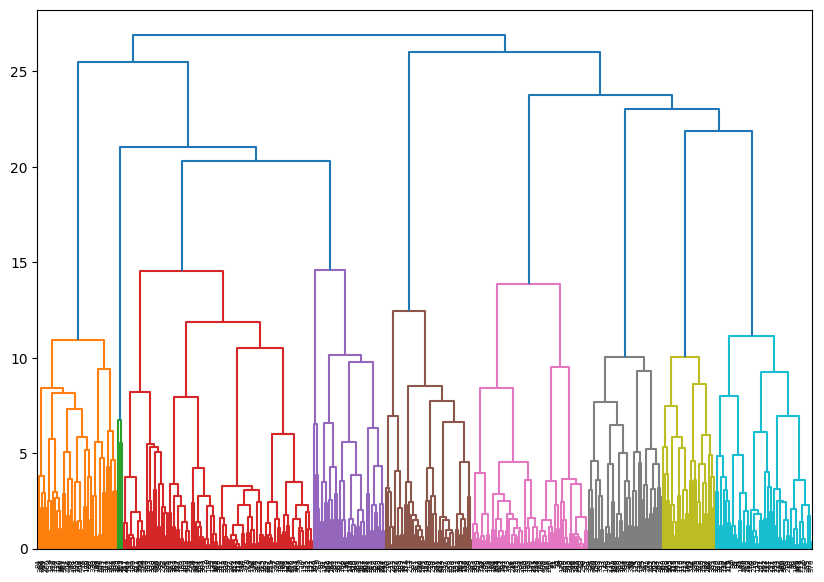

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_train, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

# To get cluster labels
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3)  # Adjust n_clusters as needed
y_hc = hc.fit_predict(X_test)

In [42]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_test)

In [43]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust n_components as needed
gmm.fit(X_train)

# Predict cluster labels
y_gmm = gmm.predict(X_test)

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_bagging = bagging.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [45]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
y_adaboost = adaboost.predict(X_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)


In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(kernel='linear'))
]

stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)
y_stacking = stacking.predict(X_test)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(kernel='linear'))
]

stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)
y_stacking = stacking.predict(X_test)


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_gb = gb.predict(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression

lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso.fit(X_train, y_train)
y_lasso = lasso.predict(X_test)

In [51]:
ridge = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)

In [52]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)
y_elastic_net = elastic_net.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

# Assuming y_test is available
accuracy_scores = {}

# K-Means Clustering
accuracy_scores['KMeans'] = accuracy_score(y_test, y_kmeans)

# Hierarchical Clustering
accuracy_scores['Hierarchical'] = accuracy_score(y_test, y_hc)

# DBSCAN (Note: DBSCAN may assign some points to noise, label -1, which can affect accuracy)
# Filtering out noise points for accuracy calculation
mask = y_dbscan != -1
accuracy_scores['DBSCAN'] = accuracy_score(y_test[mask], y_dbscan[mask])

# Gaussian Mixture Models
accuracy_scores['GMM'] = accuracy_score(y_test, y_gmm)

# Bagging
accuracy_scores['Bagging'] = accuracy_score(y_test, y_bagging)

# AdaBoost
accuracy_scores['AdaBoost'] = accuracy_score(y_test, y_adaboost)

# Stacking
accuracy_scores['Stacking'] = accuracy_score(y_test, y_stacking)

# Random Forest
accuracy_scores['Random Forest'] = accuracy_score(y_test, y_rf)

# Gradient Boosting
accuracy_scores['Gradient Boosting'] = accuracy_score(y_test, y_gb)

# L1 Regularization (Lasso)
accuracy_scores['L1 Regularization'] = accuracy_score(y_test, y_lasso)

# L2 Regularization (Ridge)
accuracy_scores['L2 Regularization'] = accuracy_score(y_test, y_ridge)

# ElasticNet Regularization
# For ElasticNet, use a classification version if available, or convert predictions to class labels
elastic_net_pred = (y_elastic_net > 0.5).astype(int)  # Example thresholding for binary classification
accuracy_scores['ElasticNet'] = accuracy_score(y_test, elastic_net_pred)

# Print all accuracy scores
for model, score in accuracy_scores.items():
    print(f"{model} Accuracy: {score:.2f}")

KMeans Accuracy: 0.18
Hierarchical Accuracy: 0.16
DBSCAN Accuracy: nan
GMM Accuracy: 0.22
Bagging Accuracy: 0.82
AdaBoost Accuracy: 0.80
Stacking Accuracy: 0.85
Random Forest Accuracy: 0.83
Gradient Boosting Accuracy: 0.83
L1 Regularization Accuracy: 0.85
L2 Regularization Accuracy: 0.85
ElasticNet Accuracy: 0.72


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
